In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
# from small_script.myFunctions import *
sys.path.insert(0, "/Users/weilu/openmmawsem")
from helperFunctions.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [3]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
# pre = "/Users/weilu/Research/server/april_2019/optimization_test/gammas/"
pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
# pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
pp = f"protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)


# pre = "/Users/weilu/Research/server/april_2019/"
location = pre + "../../phis/protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_phi_decoy_summary.txt"
A_prime = np.loadtxt(location)





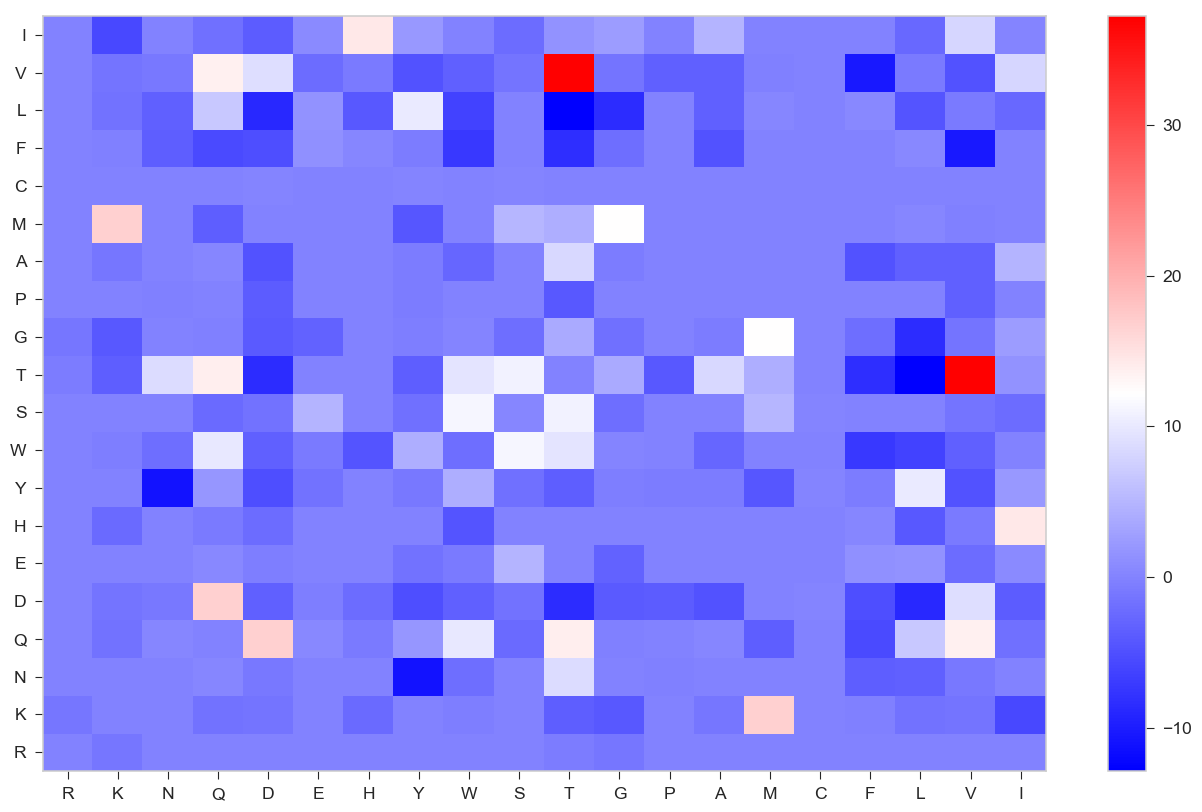

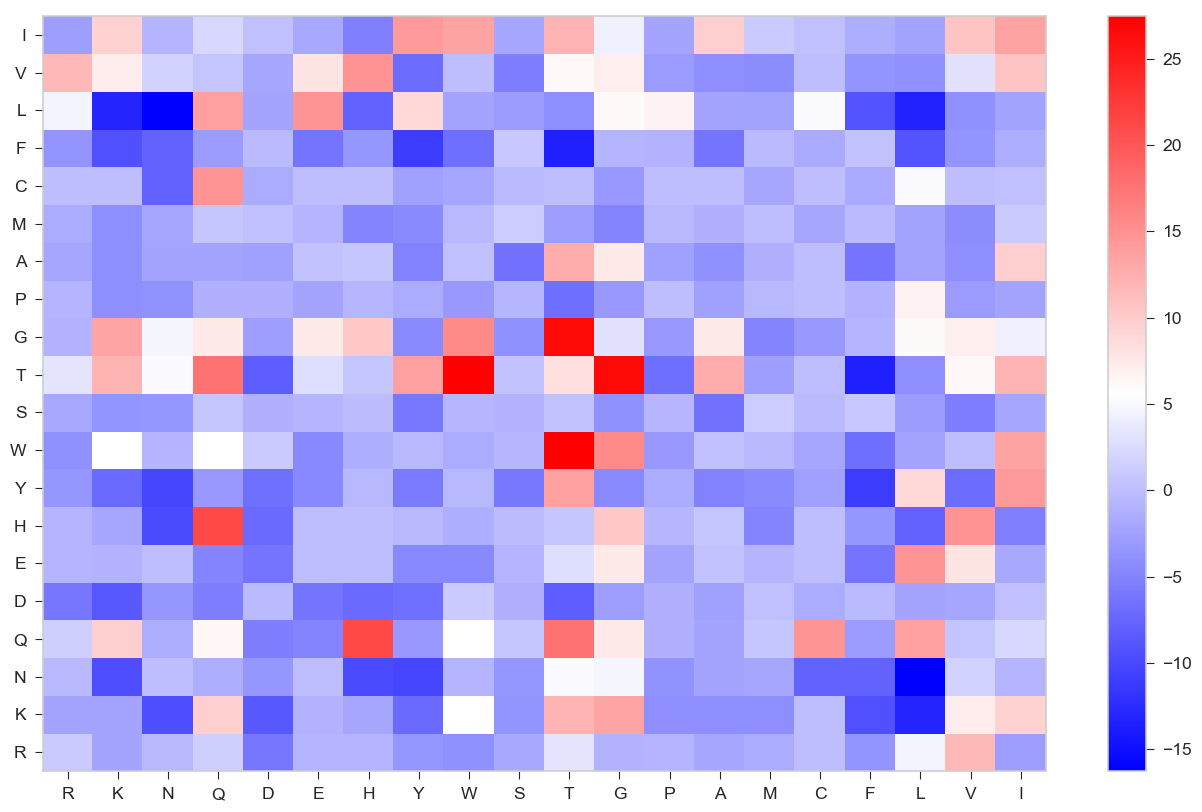

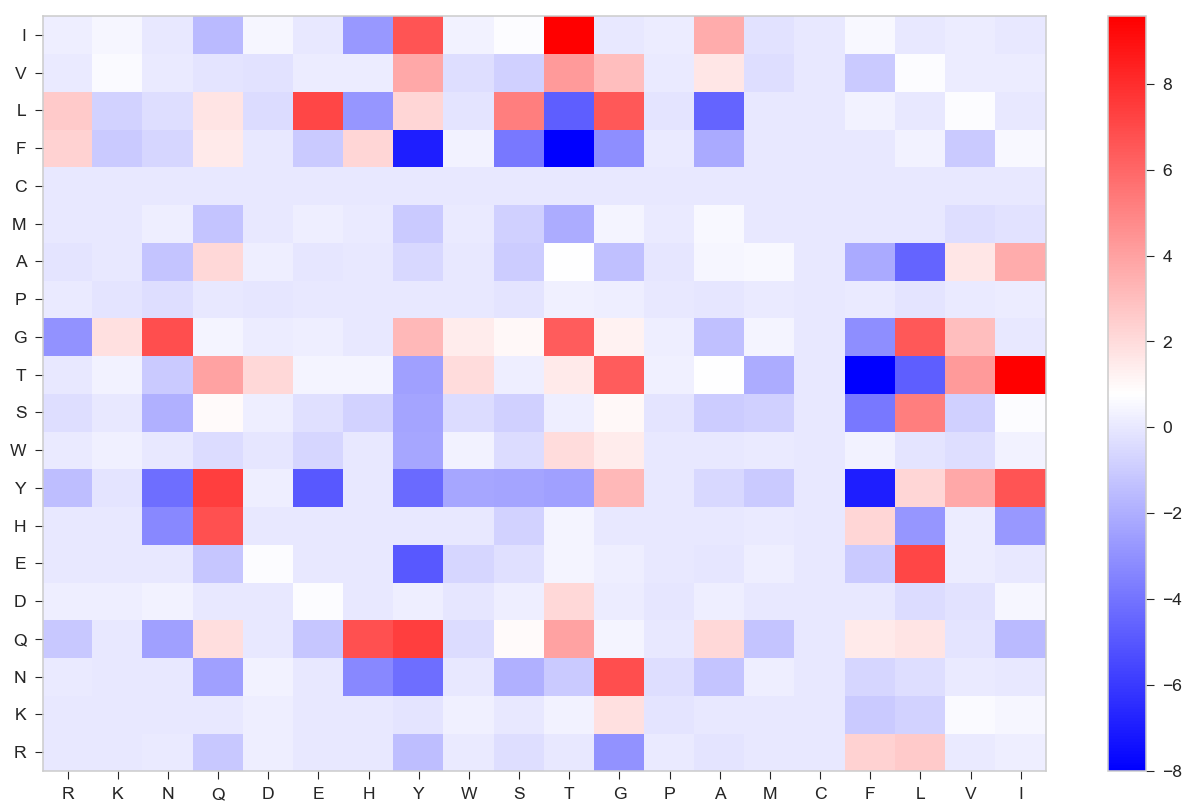

In [4]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = 100
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb, 
                                                                   cutoff_mode, P)
filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)
plot_contact_well(filtered_gamma[:210], inferBound=True)
plot_contact_well(filtered_gamma[210:420], inferBound=True)
plot_contact_well(filtered_gamma[420:], inferBound=True)

In [5]:
# maximum difference between loaded and computed is 1e-5.
max(lamb-Lamb)

(1.5022809272030481e-05+0j)

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


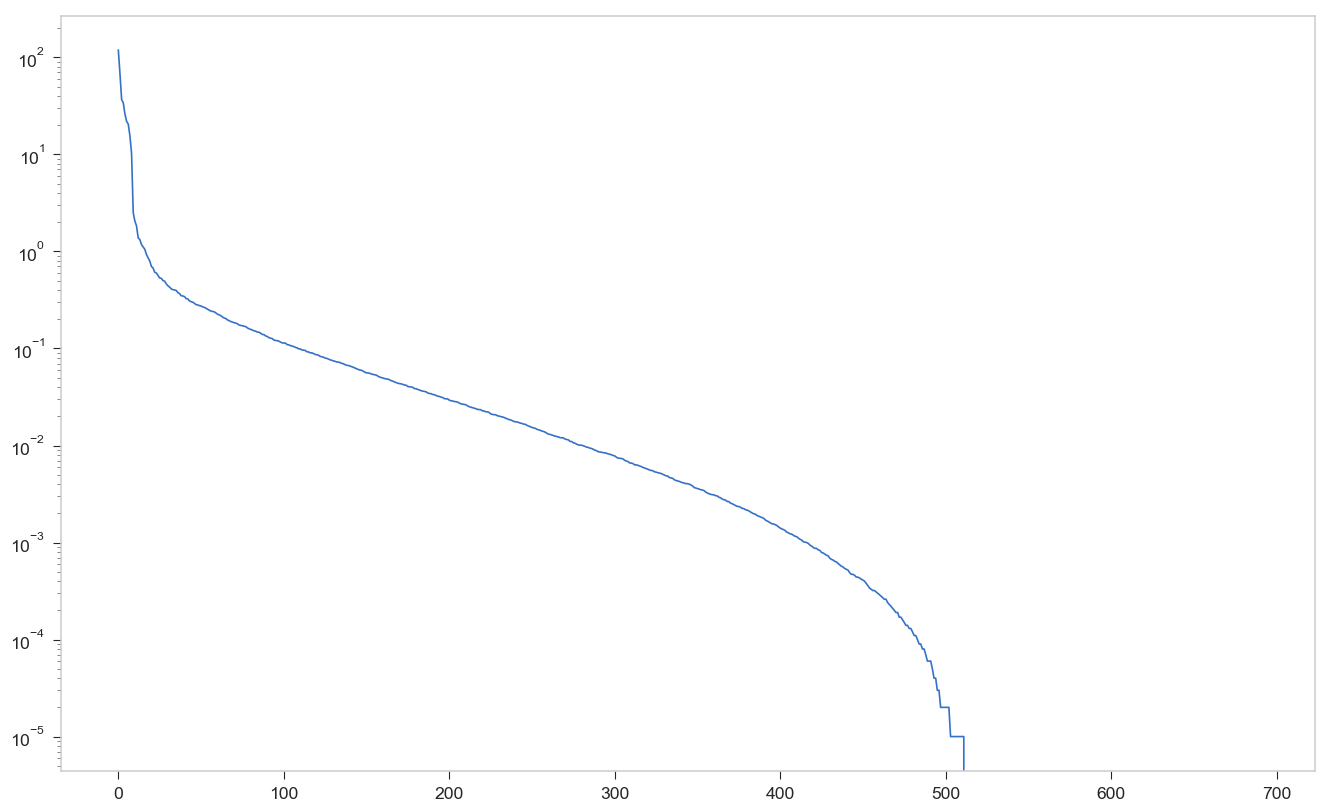

In [6]:
plt.plot(Lamb)
plt.yscale("log")

In [7]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/original_gamma"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_tiny", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 0.28501951024346306
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,0.285020,-563.839068,-561.332622,8.793945
1,2,0.107713,-567.748351,-566.811899,8.693935
2,3,-0.027309,-558.486254,-558.725908,8.775800
3,4,0.157535,-565.228535,-563.794115,9.105390
4,5,0.081485,-561.292942,-560.599687,8.507752


In [8]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,0.285020,-563.839068,-561.332622,8.793945
1,2,0.107713,-567.748351,-566.811899,8.693935
2,3,-0.027309,-558.486254,-558.725908,8.775800
3,4,0.157535,-565.228535,-563.794115,9.105390
4,5,0.081485,-561.292942,-560.599687,8.507752


In [9]:
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/original_gamma"
original_gamma = np.loadtxt(gamma_file_name)

In [10]:
np.dot(A_prime, original_gamma)

-562.2346343586077

In [11]:
# we want to impose additional contraint so that A' * gamma = constnat.(-562.23)
c = -562.23
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [12]:
np.dot(A_prime, gamma_new)

-562.2299999999993

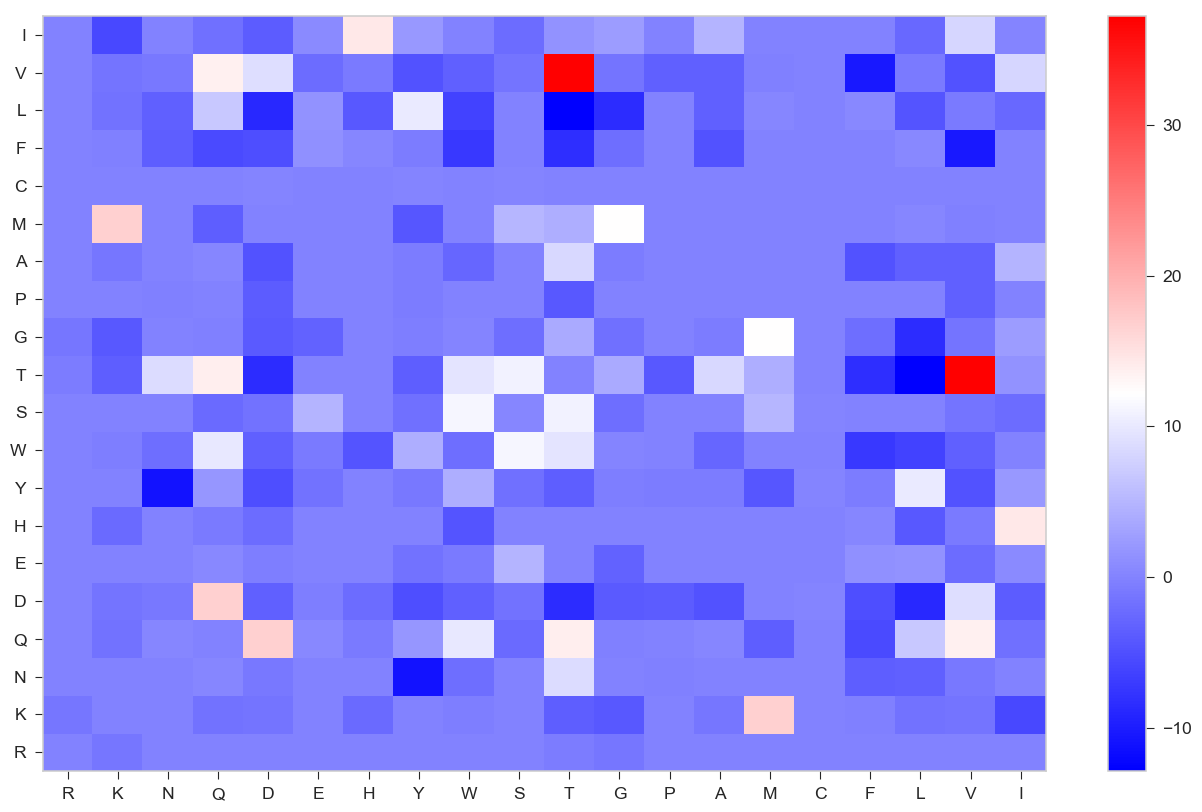

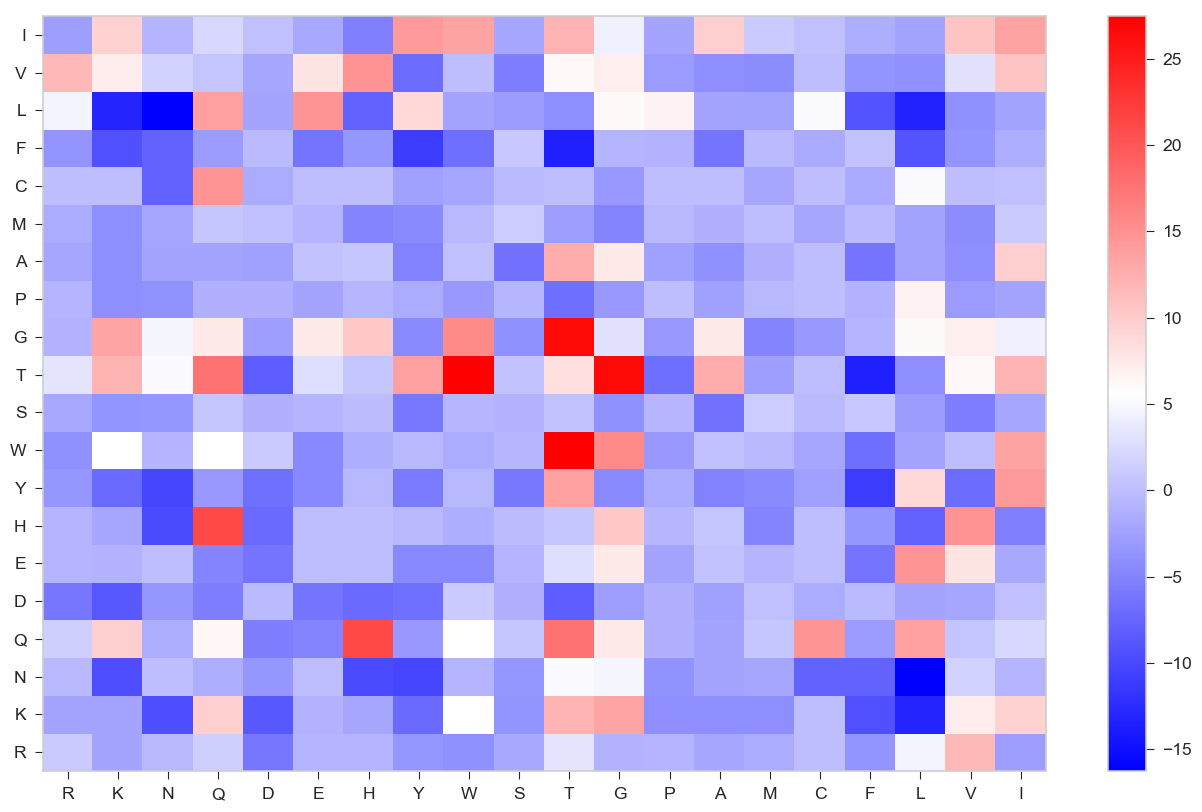

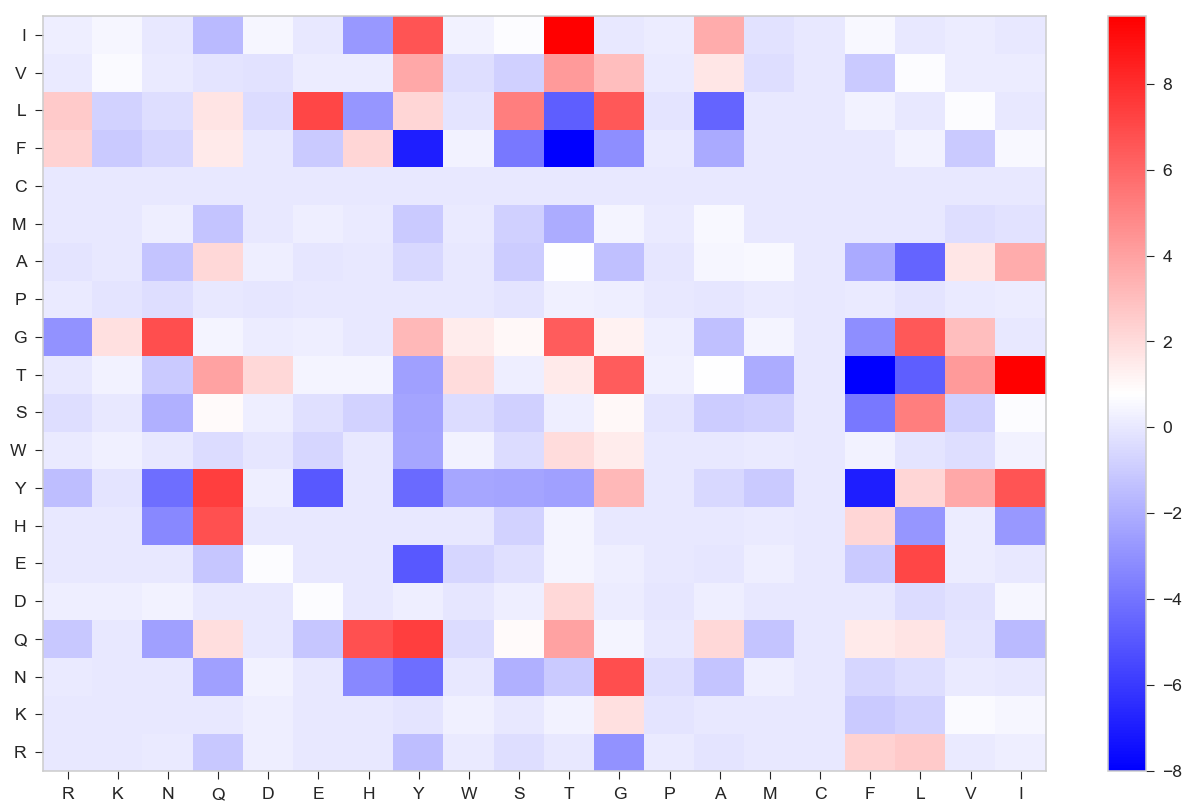

In [13]:
plot_contact_well(filtered_gamma[:210], inferBound=True)
plot_contact_well(filtered_gamma[210:420], inferBound=True)
plot_contact_well(filtered_gamma[420:], inferBound=True)

In [14]:
# impose A'gamma
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/"
# np.savetxt(f"{save_gamma_pre}/cutoff100_impose_Aprime_constraint", gamma_new)

In [15]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_tiny", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 5.650668065384711
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.650668,-2978.012973,-1235.843095,308.312196
1,2,5.615262,-2711.807657,-1040.237232,297.683400
2,3,5.751143,-2594.283031,-873.201081,299.259126
3,4,5.757088,-2705.576760,-995.833711,296.980539
4,5,5.541697,-2622.239457,-1031.635421,287.024707


In [16]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.650668,-2978.012973,-1235.843095,308.312196
1,2,5.615262,-2711.807657,-1040.237232,297.683400
2,3,5.751143,-2594.283031,-873.201081,299.259126
3,4,5.757088,-2705.576760,-995.833711,296.980539
4,5,5.541697,-2622.239457,-1031.635421,287.024707


In [17]:
# mix gammas so that we don't overfitting too much.
alpha = 0.95
mixed_gamma = alpha*original_gamma + (1-alpha)*gamma_new
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/"
# np.savetxt(f"{save_gamma_pre}/mixed_original_and_cutoff100_impose_Aprime_constraint", mixed_gamma)

In [18]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/mixed_original_and_cutoff100_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list_tiny", gamma_file_name, "shuffle", 1000, mode=0)
data


210
420
60
0 5.049209188880802
210
420
60
210
420
60
210
420
60
210
420
60


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.049209,-684.547763,-595.058146,17.723492
1,2,5.009914,-674.951316,-590.483165,16.860201
2,3,5.052534,-660.276093,-574.449667,16.986807
3,4,5.001211,-672.245947,-585.396095,17.365764
4,5,4.809522,-664.340268,-584.151473,16.672924


In [19]:
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.049209,-684.547763,-595.058146,17.723492
1,2,5.009914,-674.951316,-590.483165,16.860201
2,3,5.052534,-660.276093,-574.449667,16.986807
3,4,5.001211,-672.245947,-585.396095,17.365764
4,5,4.809522,-664.340268,-584.151473,16.672924


In [110]:
# with additional constraint
data

,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1,5.651049,-3008.457623,-1266.073497,308.329333
1,2,5.615784,-2742.978825,-1071.181503,297.696134
2,3,5.751925,-2625.236556,-903.822166,299.276227
3,4,5.757630,-2736.832105,-1026.833311,296.997018
4,5,5.541917,-2652.731026,-1061.958377,287.043734
5,6,5.640894,-2646.236207,-977.280624,295.867223
6,7,5.643035,-2595.491454,-877.928416,304.368652
7,8,5.632280,-2636.063746,-922.999355,304.151143
8,9,5.713291,-2651.458445,-931.172575,301.102450
9,10,5.940028,-2726.245430,-934.732806,301.600012
